# Cleaning the dataset

#### I preselected the following features - from 79 columns - which i believe to be the most indicative of loan performance, while reducing any redundant or correlating features.

### Importing packages and the Lending Club dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
lend = pd.read_csv('/Users/dennisvasquez/Downloads/lending-club-loan-data/loan.csv', 
                   usecols=['annual_inc','delinq_2yrs','dti','grade','inq_last_6mths','installment','int_rate',
                'issue_d','loan_amnt','loan_status','open_acc','pub_rec','term','revol_util','acc_now_delinq',
                'total_acc','tot_cur_bal'], low_memory=False);
lend.sample(5)

,loan_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,acc_now_delinq,tot_cur_bal
198183,20000.0,36 months,14.33,686.77,C,63000.0,Sep-2012,Fully Paid,22.53,0.0,1.0,9.0,0.0,57.2,11.0,0.0,38477.0
849131,35000.0,60 months,12.99,796.18,C,125000.0,Feb-2015,Current,16.64,0.0,0.0,15.0,0.0,70.8,26.0,0.0,675021.0
861097,35000.0,60 months,15.59,843.53,D,75000.0,Jan-2015,Current,25.97,0.0,0.0,18.0,0.0,41.0,33.0,0.0,182526.0
206752,15000.0,36 months,6.03,456.54,A,80000.0,Aug-2012,Fully Paid,15.14,0.0,1.0,16.0,0.0,22.1,22.0,0.0,NaN
301842,10325.0,36 months,13.98,352.79,C,40000.0,Oct-2014,Fully Paid,14.43,0.0,1.0,4.0,1.0,62.0,15.0,0.0,12470.0


In [3]:
# Number of rows by columns
lend.shape

(887379, 17)

### Cleaning the "term" column

In [4]:
# Truncating and converting the 'term' column into a float variable
lend['term'] = lend['term'].str[:3]
lend['term'] = lend['term'].astype(float)

### Converting the "grade" column into an ordinal variable

In [5]:
# Viewing the different kinds of "grades" found in the dataset
lend.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [6]:
# Create dummy variables of the grade column
lend['grade_ord'] = lend.grade.map({'A': 1,
                                    'B': 2,
                                    'C': 3,
                                    'D': 4,
                                    'E': 5,
                                    'F': 6,
                                    'G': 7})

lend[['grade','grade_ord']].sample(5)

,grade,grade_ord
253120,C,3
558927,A,1
93736,B,2
563936,D,4
428028,C,3


### Cleaning the "loan_status" column

In [7]:
# Display frequency table of all the loan status
lend.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [8]:
# Delete 'Current' and 'Issued' status, as it is not indicative in determing the final performance status of the loan
# Note the reduction in rows
lend = lend[lend.loan_status != 'Current']
lend = lend[lend.loan_status != 'Issued']
lend.shape

(277140, 18)

In [9]:
# Create binary dummy variables of the loan status column into a new column, "status_group"
lend['status_group'] = lend.loan_status.map({'Fully Paid': 1,
                                             'Charged Off': 0, 
                                             'Late (31-120 days)': 0,
                                             'In Grace Period': 0,
                                             'Late (16-30 days)': 0,
                                             'Does not meet the credit policy. Status:Fully Paid': 1,
                                             'Default': 0,
                                             'Does not meet the credit policy. Status:Charged Off': 0})

lend[['loan_status','status_group']].sample(5)

,loan_status,status_group
834173,Fully Paid,1
189458,Fully Paid,1
35675,Fully Paid,1
357489,Late (31-120 days),0
359792,Fully Paid,1


### Replacing NaN values in the dataset

In [10]:
# Replacing all 'NaN' fields with '0' throughout the entire dataset
lend = lend.replace('NaN', 0)

## Cleaning specific fields of outliers

### Cleaning the "revol_util" column of typo values

In [11]:
# Revolving account credit utilization rate column
# Shows inaccurate typo values greater than 100 (i.e. 829., 366., 153., etc.)
# Instead of correcting and dividing these rows by 10, I simply delete them from the set
lend.revol_util.describe()

count    277140.000000
mean         54.601674
std          24.808665
min           0.000000
25%          36.600000
50%          56.100000
75%          74.200000
max         892.300000
Name: revol_util, dtype: float64

In [12]:
# Shows which and how many innacurate or typo values are present, shown as greater than 100
rev = lend[(lend.revol_util > 100)].revol_util.unique()
rev

array([ 106.4,  101.8,  104.3,  104.2,  108.8,  106.1,  106.2,  100.5,
        101.4,  103.9,  102.8,  100.7,  105.2,  106.5,  103.1,  100.6,
        102.7,  103.2,  101.5,  119. ,  103.5,  105.3,  105.7,  104.5,
        100.4,  103.6,  102. ,  105.8,  103.3,  100.9,  100.1,  100.2,
        107.7,  101.1,  101.2,  101.3,  104.1,  101. ,  112.9,  100.8,
        106.9,  103.7,  101.6,  109.9,  102.5,  102.4,  100.3,  102.2,
        104.4,  128.1,  101.9,  127.6,  120.2,  109.1,  101.7,  102.6,
        105.1,  102.3,  115.3,  102.1,  122.5,  112.7,  103.4,  103.8,
        107. ,  104.9,  110.3,  107.3,  103. ,  129.5,  112.5,  118.9,
        107.2,  114.9,  109.7,  129.4,  105.5,  111.9,  112.1,  130.2,
        111. ,  113.4,  106.3,  146.1,  108.2,  106.6,  108.3,  127.4,
        123.2,  107.8,  113.1,  109.3,  108.4,  104.6,  109.5,  366.6,
        115.1,  105.4,  111.4,  148. ,  150.7,  892.3,  109.8,  153. ,
        110.1,  110.6,  108.9,  112.2,  111.3,  113. ,  105.9,  141.8,
      

In [13]:
# Keeps all values <= 100 in the "revol_util" column, deletes any rows > 100
lend = lend[lend['revol_util'] <= 100]

## Visualizing the features and their correlations

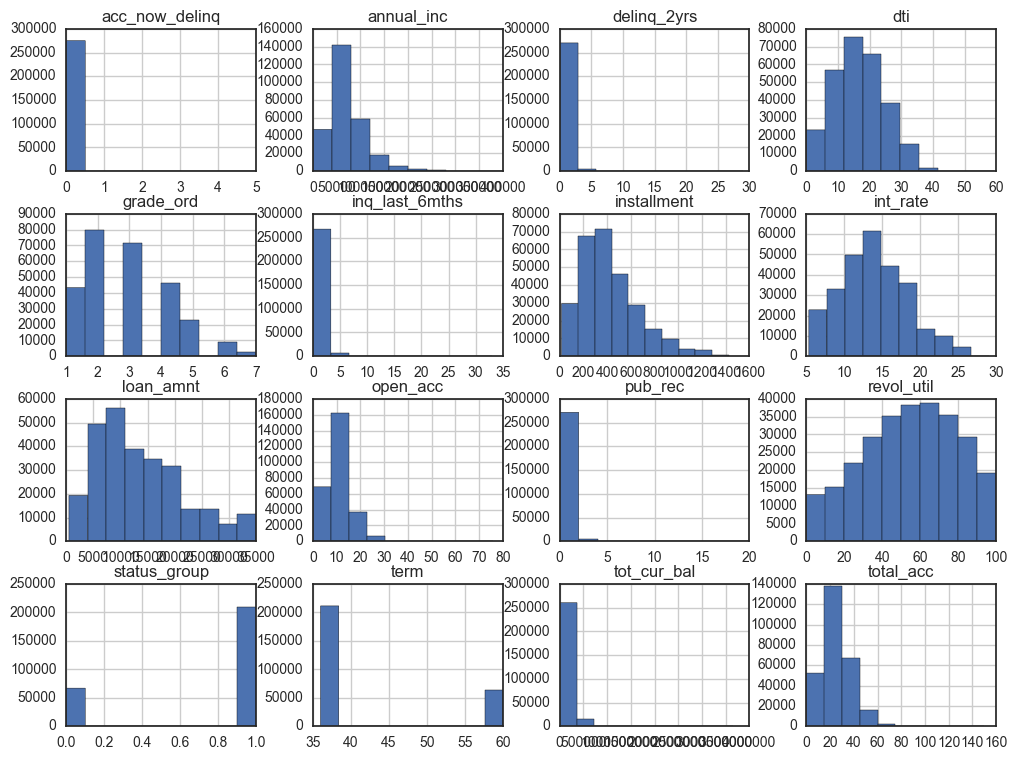

In [80]:
lend.hist(figsize = (12,9));

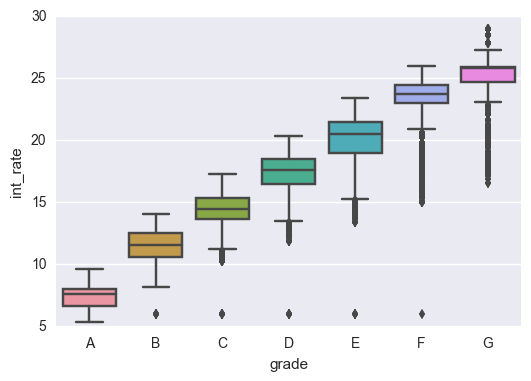

In [66]:
# Displaying boxplots of loan "grades" against interest rates
sns.boxplot(x='grade', y='int_rate', data = lend, order = ['A','B','C','D','E','F','G']);

In [ ]:
# Displaying boxplots of binary loan status (0 = bad vs 1 = good loan perfomance) against dti (debt-to-income ratios) 
sns.boxplot(x='status_group', y='dti', data = lend)

In [22]:
# Correlation matrix
corr = lend.corr()
corr

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,acc_now_delinq,tot_cur_bal,grade_ord,status_group
loan_amnt,1.000000,0.406560,0.216284,0.954534,0.338731,0.055688,0.013200,-0.008506,0.203558,-0.071099,0.104808,0.233950,0.014486,0.313597,0.209152,-0.081397
term,0.406560,1.000000,0.451136,0.170994,0.066641,0.083260,0.008197,0.025385,0.080133,-0.012709,0.060688,0.104768,0.012405,0.115908,0.465265,-0.173208
int_rate,0.216284,0.451136,1.000000,0.206269,-0.027424,0.177839,0.090733,0.201867,0.042874,0.081559,0.328793,-0.009316,0.032110,-0.002759,0.946645,-0.256713
installment,0.954534,0.170994,0.206269,1.000000,0.334271,0.054624,0.023447,0.008579,0.198138,-0.060947,0.131797,0.215249,0.016476,0.292985,0.188968,-0.063988
annual_inc,0.338731,0.066641,-0.027424,0.334271,1.000000,-0.172728,0.052219,0.051262,0.141707,-0.016389,0.024218,0.207566,0.016372,0.368139,-0.018513,0.051138
dti,0.055688,0.083260,0.177839,0.054624,-0.172728,1.000000,0.001507,-0.010191,0.310785,-0.030977,0.219647,0.232294,0.009673,0.056306,0.159389,-0.143139
delinq_2yrs,0.013200,0.008197,0.090733,0.023447,0.052219,0.001507,1.000000,0.020782,0.058301,-0.003432,-0.018214,0.130235,0.115954,0.088101,0.090619,-0.043898
inq_last_6mths,-0.008506,0.025385,0.201867,0.008579,0.051262,-0.010191,0.020782,1.000000,0.103415,0.045442,-0.087896,0.126425,-0.004409,0.024884,0.210522,-0.046177
open_acc,0.203558,0.080133,0.042874,0.198138,0.141707,0.310785,0.058301,0.103415,1.000000,-0.009390,-0.102726,0.673966,0.019685,0.248189,0.040751,-0.030573
pub_rec,-0.071099,-0.012709,0.081559,-0.060947,-0.016389,-0.030977,-0.003432,0.045442,-0.009390,1.000000,-0.065401,0.029333,0.006525,-0.017234,0.082915,-0.024303


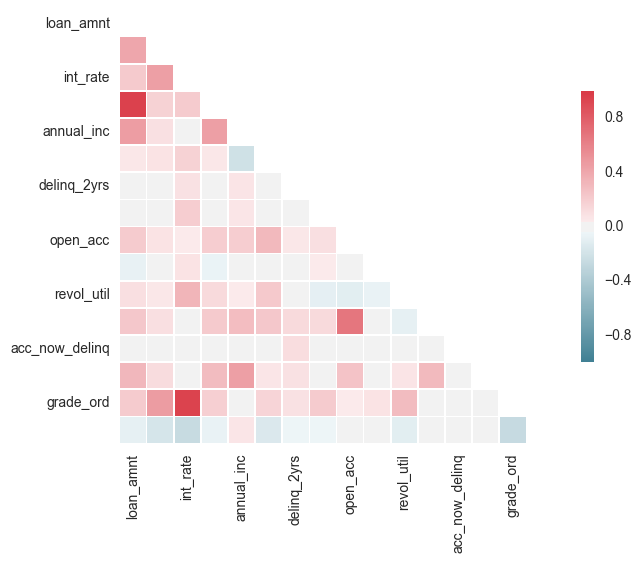

In [86]:
# Correlation matrix heatmap of columns
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

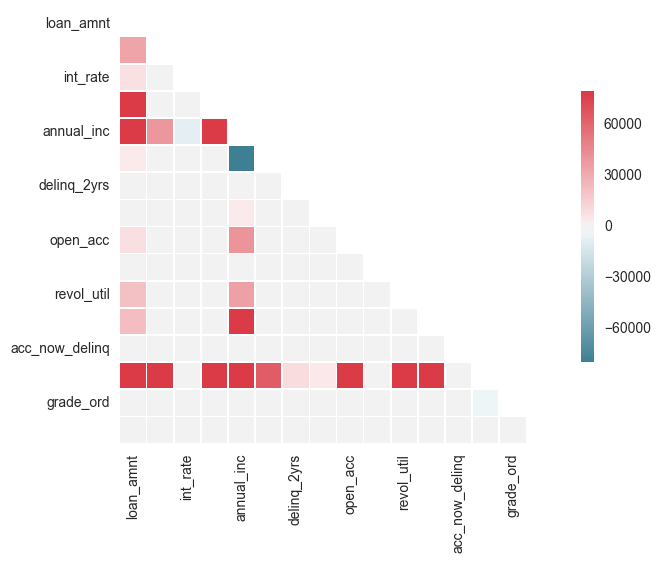

In [23]:
# Covariance matrix heatmap of columns
cov = lend.cov()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(cov, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

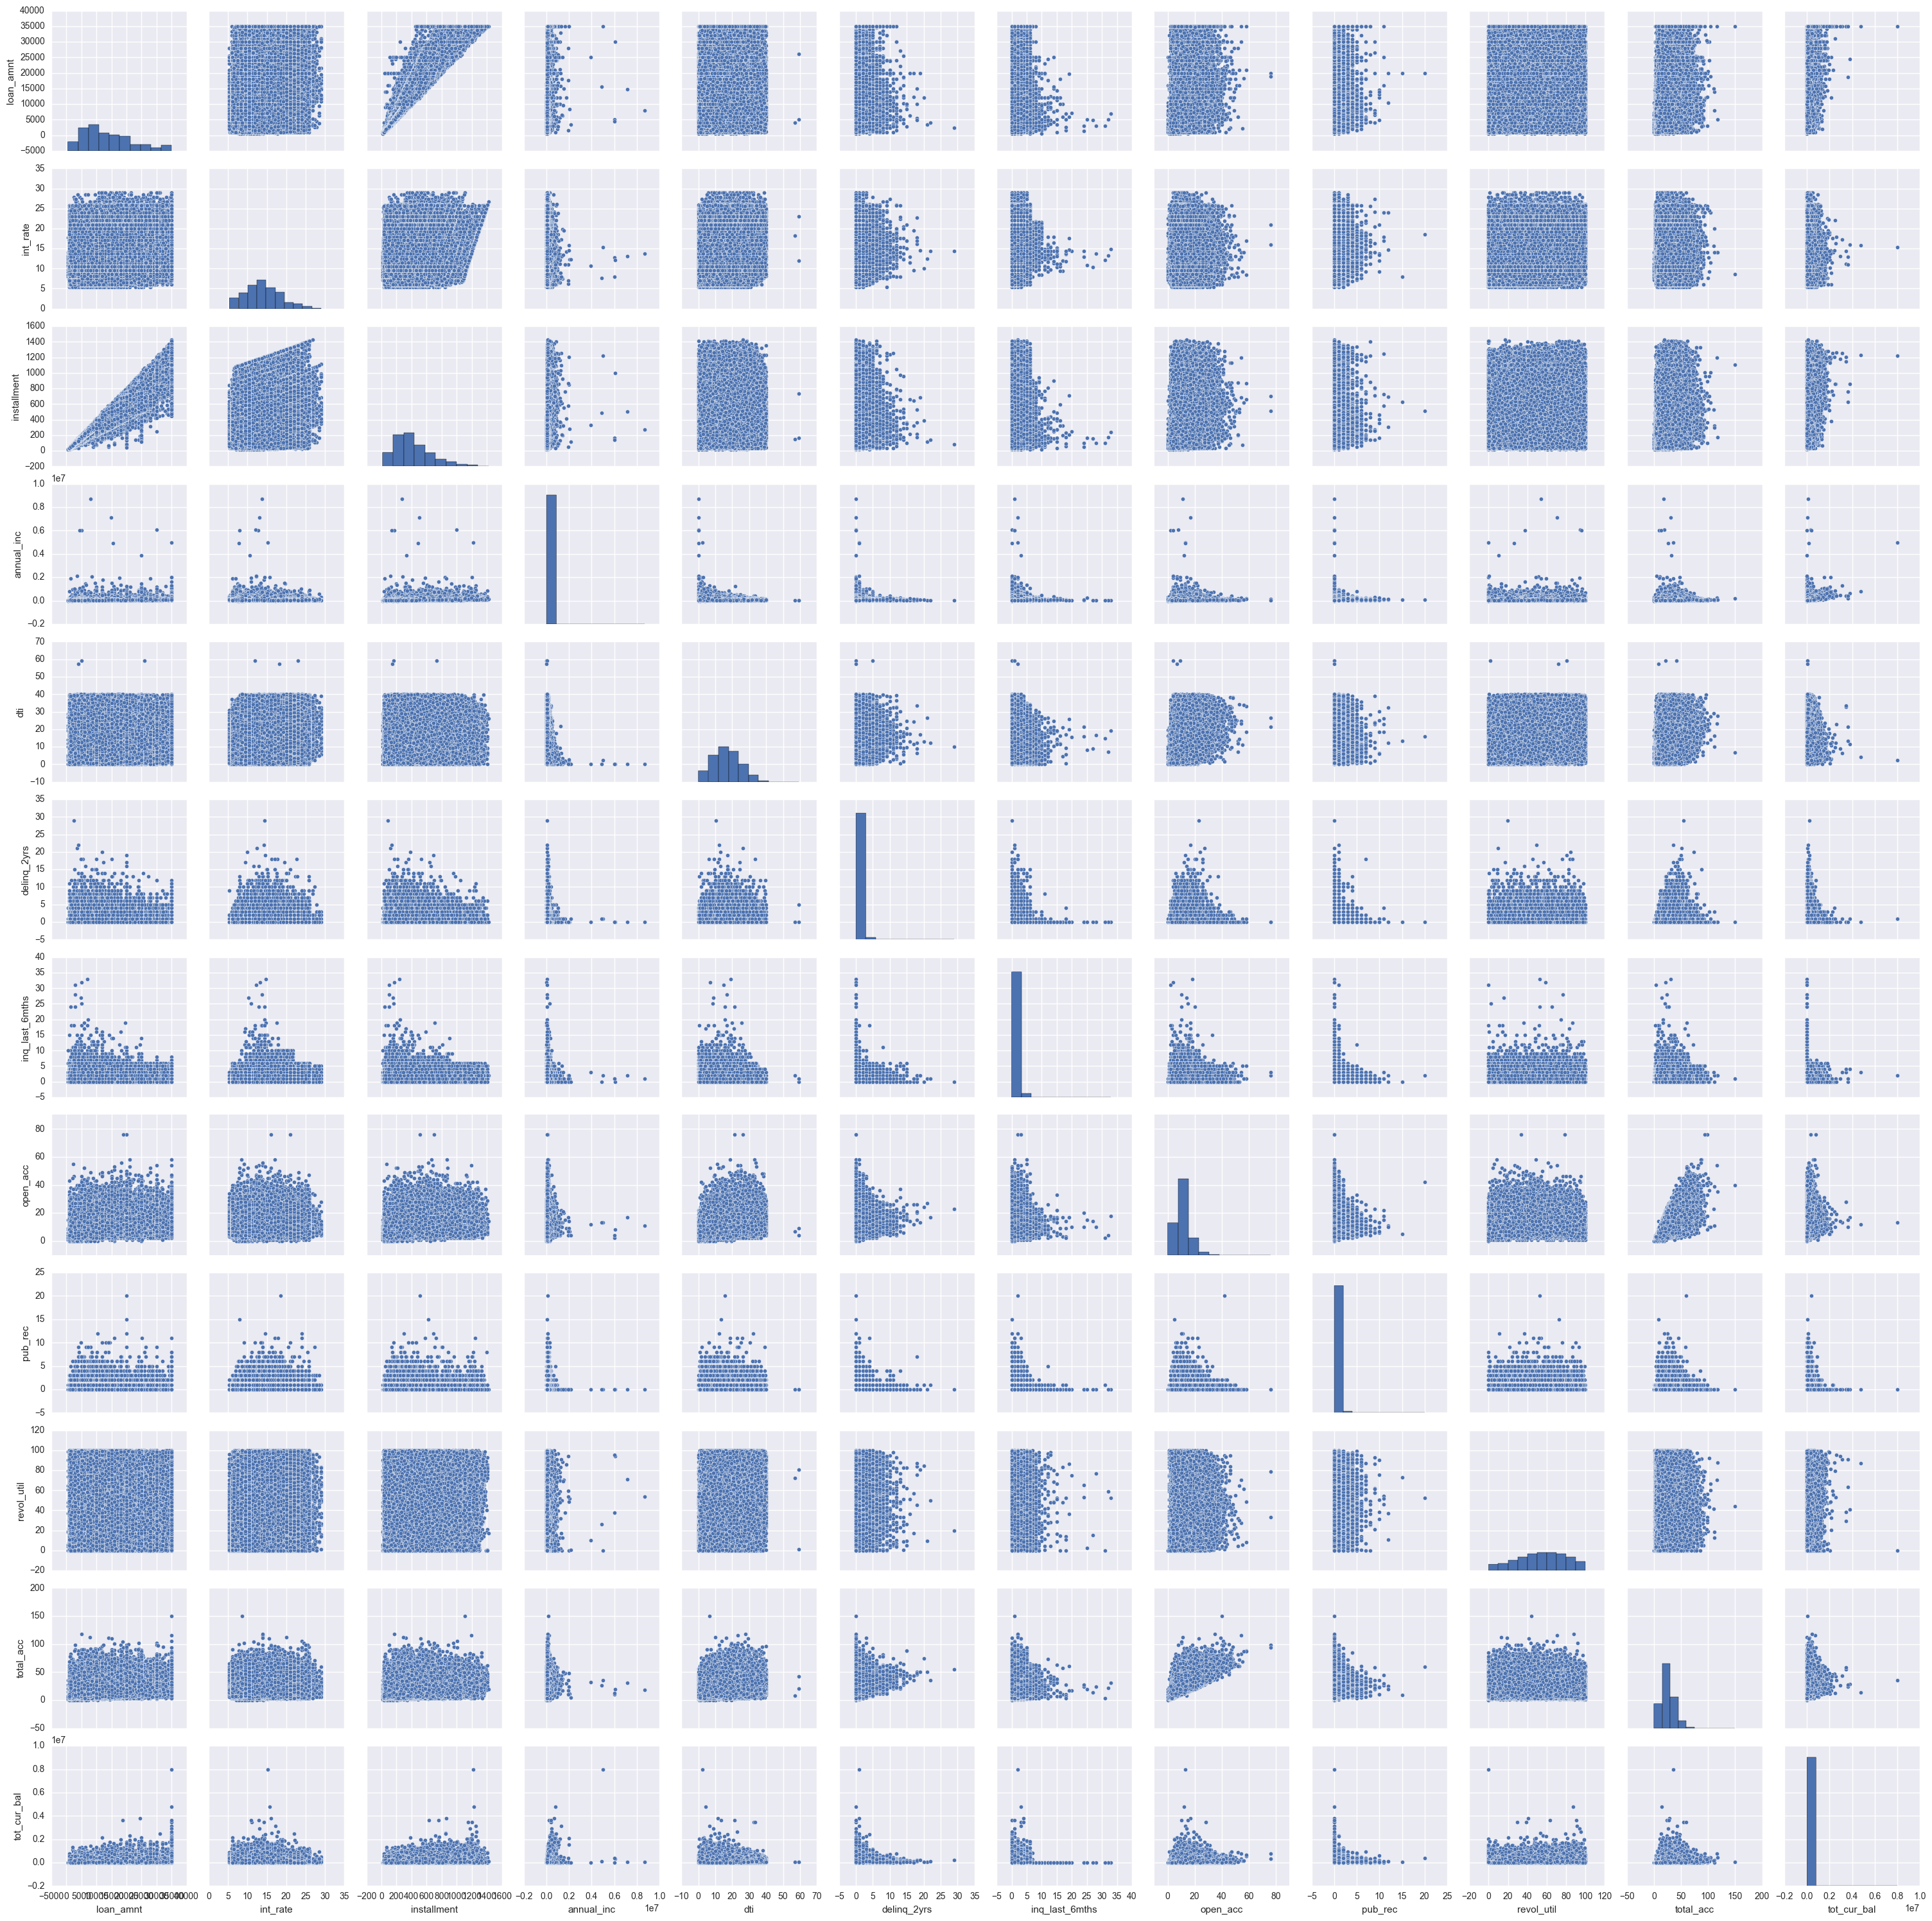

In [16]:
# Scatterplot matrix showing features against each other 
sns.pairplot(lend[['loan_amnt','int_rate','installment','annual_inc',
                   'dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec',
                   'revol_util','total_acc','tot_cur_bal']]);